In [ ]:
- 분포가 심하게 왜곡되었을 경우 로그변환을 적용하는 것이 좋다.
- 로지스틱 회귀는 분류 알고리즘이다.
- 주성분을 가진 데이터 세트로 차원축소 : PCA

In [ ]:
- PCA에서 데이터 변동성이 가장 큰 방향으로 축을 생성
- '피처 선택' : 불필요한 피처는 아예 제거하고 데이터의 특징을 잘 나타내는 피처만 선택 p399
- 로그변환을 할 때 그 함수는 np.log1p()이다
  변환후 다시 지수로 변환하는 함수는 np.expm1()이다.

In [ ]:
차원 축소를 진행 한 이후 원래 자료로 완벽하게 복구할 수 있나요?
-> X

LinearRegression의 아웃풋 : x에 대한 int, float, 연속형 결과
LogisticRegression의 아웃풋 : x에 대한 범주형 결과

회귀트리 Regressor 클래스는 coef_ 속성이 없고
대신 feature_importances_를 이용해 피처별 중요도를 알 수 있다.
-> O

In [ ]:
로지스틱 회귀는  0~1 사이에서 완만한 S_curve를 그린다.
이 곡선의 이름은?
-> 시그모이드 함수

머신러닝에서 결과에 대한 예측 확률을 높이기 위해 전처리 작업을 시도하려고 합니다.
시도해 볼 수 있는 전처리 작업들의 종류들을 적어주세요.
-> 결측치 처리, 이상치 제거 , 레이블 인코딩, 원핫 인코딩, 정규화 , 표준화, 로그변환, 차원축소

LogisticRegression 클래스의 하이퍼 피라미터 중 'C'값은 alpha값의 역수이며, 작을 수록 규제 강도가 크다.

PCA(n_compoenets= )에서 n_components의 역할은?
-> 몇 개의 차원으로 줄일지 결정

In [3]:
import pydataset
mpg = pydataset.data('mpg')
mpg[:2]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


In [17]:
# 1. manufacturer는 모두 몇 개 회사?
manufacturer = mpg.manufacturer.value_counts()[:5]
manufacturer

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
Name: manufacturer, dtype: int64

<AxesSubplot:>

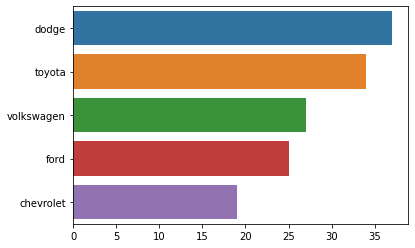

In [22]:
import seaborn as sns
sns.barplot(x=manufacturer.values,y=manufacturer.index)

In [29]:
# 행추출
mpg.manufacturer.value_counts()[:5]

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
Name: manufacturer, dtype: int64

In [33]:
a=['dodge','toyota','volkswagen','ford','chevrolet']
mpg[mpg['manufacturer'].isin(a)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
21,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
22,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
23,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
24,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
25,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
26,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
27,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
28,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater


In [38]:
a=['dodge','toyota','volkswagen','ford','chevrolet']
mpg.query("manufacturer in @a")  # query문에서 @는 변수 표시

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
21,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
22,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
23,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
24,chevrolet,corvette,5.7,1999,8,manual(m6),r,16,26,p,2seater
25,chevrolet,corvette,5.7,1999,8,auto(l4),r,15,23,p,2seater
26,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
27,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater
28,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater


In [ ]:
# 행추출 총 정리
top5=['dodge','toyota','volkswagen','ford','chevrolet']

mpg[mpg['manufacturer'].isin(top5)] 
mpg[ mpg['manufacturer'].apply(lambda x: x in top5 ) ] 
mpg.query(" manufacturer in @top5") 
mpg.query(" manufacturer == @top5") 
mpg.query(" manufacturer in ['dodge','toyota','volkswagen','ford','chevrolet']")
mpg.query(" manufacturer == ['dodge','toyota','volkswagen','ford','chevrolet']") 

# LDA

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)

iris_lda = lda.transform(iris_scaled)
iris_lda

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

# TruncatedSVD

In [43]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
iris_tsvd = tsvd.fit_transform(iris_ftrs)
iris_tsvd

array([[ 5.91274714e+00,  2.30203322e+00],
       [ 5.57248242e+00,  1.97182599e+00],
       [ 5.44697714e+00,  2.09520636e+00],
       [ 5.43645948e+00,  1.87038151e+00],
       [ 5.87564494e+00,  2.32829018e+00],
       [ 6.47759822e+00,  2.32464996e+00],
       [ 5.51597520e+00,  2.07090423e+00],
       [ 5.85092859e+00,  2.14807482e+00],
       [ 5.15891972e+00,  1.77506408e+00],
       [ 5.64500117e+00,  1.99000106e+00],
       [ 6.26539771e+00,  2.42576813e+00],
       [ 5.75200785e+00,  2.02037338e+00],
       [ 5.48058085e+00,  1.97777558e+00],
       [ 4.95112411e+00,  2.04828749e+00],
       [ 6.52596417e+00,  2.91606081e+00],
       [ 6.79037199e+00,  2.82500759e+00],
       [ 6.27239468e+00,  2.60811578e+00],
       [ 5.92953789e+00,  2.26766614e+00],
       [ 6.64813130e+00,  2.38959506e+00],
       [ 6.09486463e+00,  2.36082303e+00],
       [ 6.25397363e+00,  2.12001187e+00],
       [ 6.07364677e+00,  2.27178150e+00],
       [ 5.36999813e+00,  2.49808604e+00],
       [ 6.

# K-means Clustering

In [57]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd

iris = load_iris()

In [61]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0)

In [62]:
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=0)

In [64]:
kmeans.labels_  #군집 끝

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [65]:
# 변수의 갯수를 줄여도 군집이 잘 되는지 보기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris.data_pca = pca.fit_transform(iris.data)
iris.data_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [66]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0)
kmeans.fit(iris.data_pca)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

50개씩 잘 묶었느냐가 중요하다.(0,1,2는 별로 중요하지 않음.)

# 실루엣 계수 구하기

In [72]:
from sklearn.metrics import silhouette_samples, silhouette_score

iris = load_iris()
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)

In [73]:
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=0)

In [74]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [75]:
silhouette_score(iris.data, kmeans.labels_)

0.5528190123564095

In [76]:
silhouette_samples(iris.data, kmeans.labels_)

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26525405, 0.34419223, 0.57829491,
       0.37478707, 0.58710354, 0.55107857, 0.48216686, 0.56310057,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

# 군집화 알고리즘 테스트를 위한 데이터 생성 p440

<AxesSubplot:>

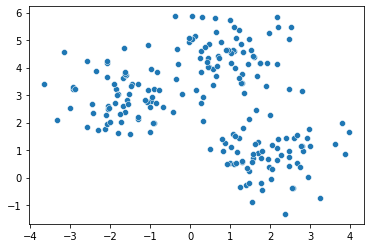

In [91]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=.8, random_state=0)

sns.scatterplot(x=X[:, 0], y=X[:,1])

In [84]:
# X를 3개의 군집으로 만들어주세요.
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit_transform(X)
kmeans.labels_
silhouette_score(X, kmeans.labels_) 

0.5764726251866076

In [85]:
# 200개의 데이터가 각각 몇 번 군집으로 할당되었는지 나타내기.
unique, counts = np.unique(y, return_counts=True)

In [87]:
counts

array([67, 67, 66], dtype=int64)

In [ ]:
# y와 label하고 비교해서 몇 개나 같은지(==) 개수는 몇 개인가?


In [90]:
y[y==2] = 3 #겹치지 않게 잠깐 3으로 바꿔둠
y[y==1] = 2
y[y==3] = 1

y

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1])

In [136]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris=load_iris()

# DF변환
irisDF=pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [137]:
# 군집화
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)


kmeans.fit(irisDF) 

KMeans(n_clusters=3, random_state=0)

In [138]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
kmeans.fit_predict(X)
kmeans.labels_

array([2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0,
       1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2,
       2, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 2, 0,
       0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 0,
       0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0,
       1, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 2,
       0, 1, 2, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0,
       1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2,
       1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0,

In [139]:
y

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,

In [140]:
y[y==2] = 3
y[y==1] = 2
y[y==3] = 1
y

array([2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0,

In [141]:
kmeans.labels_ == y 

array([ True, False, False,  True, False,  True, False,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True,  True, False, False,
       False, False,

# Mean shift p449

In [102]:
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=.7, random_state=0)

meanshift = MeanShift(bandwidth=2)
cluster_labels = meanshift.fit_predict(X)
cluster_labels

array([0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2,
       1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 0,
       2, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0,
       1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2,
       1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2,
       2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0,
       1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2,
       1, 2], dtype=int64)

In [100]:
# 200개 중에 몇 개가 맞는가?
y[y==2] = 12 #겹치지 않게 잠깐 3으로 바꿔둠
y[y==1] = 11
y[y==0] = 10

y[y==12] = 0
y[y==11] = 1 #겹치지 않게 잠깐 3으로 바꿔둠
y[y==10] = 2

In [101]:
cluster_labels == y

array([ True, False, False,  True, False,  True, False, False, False,
        True, False,  True, False, False, False,  True, False, False,
       False,  True,  True, False, False, False,  True, False, False,
        True,  True,  True, False, False,  True, False, False, False,
       False, False, False,  True, False,  True,  True,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
        True, False,

# DBSCAN

In [104]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.6, min_samples=8, metric='euclidean')
dbscan.fit_predict(iris.data)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [113]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=.05, random_state=0, factor=.5)

In [114]:
y

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,

<AxesSubplot:>

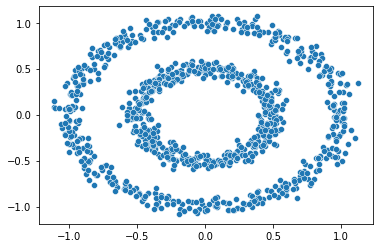

In [115]:
sns.scatterplot(x=X[:, 0], y=X[:,1])

In [117]:
dbscan = DBSCAN(eps=.2, min_samples=10)

dbscan.fit_predict(X)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,